## GPS 좌표/ 여행/ 방문지정보 Table Merge

출처: 국내 여행로그 데이터(제주도 및 도서지역)  
동부권/서부권/수도권 적용 가능  

In [2]:
import pandas as pd
import os
import folium
import joblib

In [2]:
# gps 파일들이 위치한 디렉토리 경로
directory_path = './jeju_gps_data'

In [3]:
# 결과를 저장할 빈 데이터프레임 생성
result_df = pd.DataFrame(columns=['Filename', 'X_COORD_Mean', 'Y_COORD_Mean'])
result_df

,Filename,X_COORD_Mean,Y_COORD_Mean


In [4]:
# 디렉토리 내 모든 CSV 파일들을 순회

for file in os.listdir(directory_path):
    if file.endswith('.csv'):
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path)

        # TRAVEL_ID 컬럼의 첫 번째 값을 추출
        travel_id = df['TRAVEL_ID'].iloc[0] if 'TRAVEL_ID' in df.columns else 'N/A'

        x_mean = df['X_COORD'].mean()
        y_mean = df['Y_COORD'].mean()

        # TRAVEL_ID를 포함한 새로운 행 추가
        new_row = pd.DataFrame({'Filename': [file], 'X_COORD_Mean': [x_mean], 'Y_COORD_Mean': [y_mean], 'TRAVEL_ID': [travel_id]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)


C:\Users\sec\AppData\Local\Temp\ipykernel_31076\3691941191.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row], ignore_index=True)


In [5]:
# 컬럼명 변경
result_df.rename(columns={'X_COORD_Mean': 'Y_COORD_Mean_Temp', 'Y_COORD_Mean': 'X_COORD_Mean'}, inplace=True)

# 임시로 사용한 컬럼명을 다시 원래 이름으로 변경
result_df.rename(columns={'Y_COORD_Mean_Temp': 'Y_COORD_Mean'}, inplace=True)

In [6]:
result_df

,Filename,Y_COORD_Mean,X_COORD_Mean,TRAVEL_ID
0,tn_gps_coord_a_a000047.csv,126.461073,37.447909,a_a000047
1,tn_gps_coord_a_a000159.csv,126.631210,37.271269,a_a000159
2,tn_gps_coord_a_a000169.csv,126.488490,37.451375,a_a000169
3,tn_gps_coord_a_a000205.csv,126.639144,37.243036,a_a000205
4,tn_gps_coord_a_a000220.csv,126.553244,37.090635,a_a000220
...,...,...,...,...
3195,tn_gps_coord_d_d012487.csv,126.246240,33.335404,d_d012487
3196,tn_gps_coord_d_d012488.csv,126.318975,33.320801,d_d012488
3197,tn_gps_coord_d_d012489.csv,126.488216,33.449830,d_d012489
3198,tn_gps_coord_d_d012491.csv,126.368438,33.354688,d_d012491


In [7]:
# 컬럼 순서 변경
result_df = result_df[['TRAVEL_ID', 'X_COORD_Mean', 'Y_COORD_Mean']]
result_df

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean
0,a_a000047,37.447909,126.461073
1,a_a000159,37.271269,126.631210
2,a_a000169,37.451375,126.488490
3,a_a000205,37.243036,126.639144
4,a_a000220,37.090635,126.553244
...,...,...,...
3195,d_d012487,33.335404,126.246240
3196,d_d012488,33.320801,126.318975
3197,d_d012489,33.449830,126.488216
3198,d_d012491,33.354688,126.368438


In [ ]:
!pip install folium

In [8]:
# X_COORD: 위도, Y_COORD: 경도 
# 제주도의 위도와 경도 범위
# 소수점으로 보다 정확히 표현 
jeju_latitude_range = (33.1908, 33.5639)  # 위도 범위
jeju_longitude_range = (126.1453, 126.9722)  # 경도 범위

# gps 평균 데이터 -> 제주도 내 데이터만 필터링
jeju_data = result_df[
    (result_df['Y_COORD_Mean'] >= jeju_longitude_range[0]) & (result_df['Y_COORD_Mean'] <= jeju_longitude_range[1]) &
    (result_df['X_COORD_Mean'] >= jeju_latitude_range[0]) & (result_df['X_COORD_Mean'] <= jeju_latitude_range[1])
]

jeju_data   # gps 데이터 3200 data -> 1127 data 

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean
148,a_a002976,33.469239,126.699847
252,a_a006612,33.440663,126.698620
667,c_c009057,33.354685,126.404792
674,d_d000014,33.552645,126.605608
676,d_d000020,33.481795,126.670059
...,...,...,...
3195,d_d012487,33.335404,126.246240
3196,d_d012488,33.320801,126.318975
3197,d_d012489,33.449830,126.488216
3198,d_d012491,33.354688,126.368438


In [9]:
## gps 데이터 제주도 한정 
out_of_range = jeju_data[
    (jeju_data['X_COORD_Mean'] < jeju_latitude_range[0]) | (jeju_data['X_COORD_Mean'] > jeju_latitude_range[1]) |
    (jeju_data['Y_COORD_Mean'] < jeju_longitude_range[0]) | (jeju_data['Y_COORD_Mean'] > jeju_longitude_range[1])
]

# 결과 출력
print(out_of_range)

Empty DataFrame
Columns: [TRAVEL_ID, X_COORD_Mean, Y_COORD_Mean]
Index: []


In [10]:
# 필터링된 데이터에서 랜덤으로 10개의 행 선택 (데이터가 10개 미만일 경우 모든 데이터 사용)
random_rows = jeju_data.sample(n=min(100, len(jeju_data)), random_state=1) if len(jeju_data) > 0 else jeju_data

# 지도 생성
# 제주도의 대략적인 중심 좌표를 사용하여 지도 초기화
map_jeju = folium.Map(location=[33.3774, 126.55], zoom_start=10)

# 지도에 포인트 추가
for idx, row in random_rows.iterrows():
    folium.Marker([row['X_COORD_Mean'], row['Y_COORD_Mean']], popup=row['TRAVEL_ID']).add_to(map_jeju)

# 지도 표시
map_jeju

In [11]:
df2 = pd.read_csv('jeju_data/tn_travel_여행_D.csv')
df2

# 1. df2에서 필요한 컬럼만 선택
df2_filtered = df2[['TRAVEL_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD']]

# 2. result_df와 df2_filtered를 TRAVEL_ID 컬럼을 기준으로 병합
merged_df = pd.merge(result_df, df2_filtered, on='TRAVEL_ID', how='inner')
merged_df

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD
0,a_a000047,37.447909,126.461073,2022-08-17,2022-08-20
1,a_a000159,37.271269,126.631210,2022-08-13,2022-08-16
2,a_a000169,37.451375,126.488490,2022-08-05,2022-08-07
3,a_a000205,37.243036,126.639144,2022-08-22,2022-08-25
4,a_a000220,37.090635,126.553244,2022-08-22,2022-08-25
...,...,...,...,...,...
2524,d_d012487,33.335404,126.246240,2022-11-11,2022-11-12
2525,d_d012488,33.320801,126.318975,2022-11-12,2022-11-13
2526,d_d012489,33.449830,126.488216,2022-11-13,2022-11-14
2527,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10


In [12]:
### 이슈: merge되면서 제주도 바깥 데이터 들어와버림 -> 필터링 필요
# X_COORD_Mean, Y_COORD_Mean이 제주도 범위를 벗어나는지 확인
out_of_range = merged_df[
    (merged_df['X_COORD_Mean'] < jeju_latitude_range[0]) | (merged_df['X_COORD_Mean'] > jeju_latitude_range[1]) |
    (merged_df['Y_COORD_Mean'] < jeju_longitude_range[0]) | (merged_df['Y_COORD_Mean'] > jeju_longitude_range[1])
]

# out_of_range에 해당하지 않는 데이터만 선택하여 새로운 데이터프레임 생성
merged_df = merged_df[~merged_df.index.isin(out_of_range.index)]
merged_df

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD
125,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24
206,a_a006612,33.440663,126.698620,2022-10-22,2022-10-23
546,d_d000020,33.481795,126.670059,2022-08-05,2022-08-10
548,d_d000033,33.380501,126.441604,2022-08-05,2022-08-12
550,d_d000039,33.500253,126.518000,2022-08-11,2022-08-17
...,...,...,...,...,...
2524,d_d012487,33.335404,126.246240,2022-11-11,2022-11-12
2525,d_d012488,33.320801,126.318975,2022-11-12,2022-11-13
2526,d_d012489,33.449830,126.488216,2022-11-13,2022-11-14
2527,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10


In [13]:
df3 = pd.read_csv('jeju_data/tn_visit_area_info_방문지정보_D.csv')
df3.head()

C:\Users\sec\AppData\Local\Temp\ipykernel_31076\2588897917.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('jeju_data/tn_visit_area_info_방문지정보_D.csv')


,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2210210002,d_d006731,7,미스틱3도,2022-10-21,2022-10-21,제주특별자치도 제주시 1100로 2894-49,제주특별자치도 제주시 노형동 291-10,126.487556,33.449947,...,신비원(석부작돌공원),60.0,13,N,2.0,NaN,5.0,5.0,5.0,NaN
1,2210180004,d_d002613,3,에스제이렌트카,2022-10-18,2022-10-18,제주특별자치도 제주시 오일장중길 100,제주특별자치도 제주시 도두일동 1286-1,126.477007,33.498441,...,푸조렌트카,30.0,10,N,2.0,NaN,4.0,4.0,4.0,NaN
2,2209030004,d_d001011,20,루프탑정원,2022-09-03,2022-09-03,NaN,NaN,126.745408,33.28386,...,NaN,60.0,24,N,2.0,7.0,2.0,1.0,2.0,50130.0
3,2209170005,d_d001386,17,법환식당,2022-09-17,2022-09-17,제주특별자치도 서귀포시 이어도로 1046,제주특별자치도 서귀포시 서호동 128-7,126.522849,33.245022,...,NaN,30.0,11,N,9.0,NaN,5.0,4.0,5.0,NaN
4,2210090001,d_d002308,16,돌카롱 중문점,2022-10-09,2022-10-09,제주특별자치도 서귀포시 중문로41번길 8,제주특별자치도 서귀포시 중문동 1588-1,126.424303,33.255724,...,NaN,30.0,11,N,2.0,NaN,4.0,4.0,4.0,NaN


In [14]:
# 데이터프레임의 'X_COORD'와 'Y_COORD' 컬럼을 실수형으로 변환
df3['X_COORD'] = pd.to_numeric(df3['X_COORD'], errors='coerce')
df3['Y_COORD'] = pd.to_numeric(df3['Y_COORD'], errors='coerce')

In [15]:
# 위도 및 경도에 따라 필터링
visit_jeju_data = df3[(df3['Y_COORD'] >= jeju_latitude_range[0]) & (df3['Y_COORD'] <= jeju_latitude_range[1]) &
                      (df3['X_COORD'] >= jeju_longitude_range[0]) & (df3['X_COORD'] <= jeju_longitude_range[1])]

In [16]:
visit_jeju_data     # 66272 -> 43164 data 

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
0,2210210002,d_d006731,7,미스틱3도,2022-10-21,2022-10-21,제주특별자치도 제주시 1100로 2894-49,제주특별자치도 제주시 노형동 291-10,126.487556,33.449947,...,신비원(석부작돌공원),60.0,13,N,2.0,NaN,5.0,5.0,5.0,NaN
1,2210180004,d_d002613,3,에스제이렌트카,2022-10-18,2022-10-18,제주특별자치도 제주시 오일장중길 100,제주특별자치도 제주시 도두일동 1286-1,126.477007,33.498441,...,푸조렌트카,30.0,10,N,2.0,NaN,4.0,4.0,4.0,NaN
2,2209030004,d_d001011,20,루프탑정원,2022-09-03,2022-09-03,NaN,NaN,126.745408,33.283860,...,NaN,60.0,24,N,2.0,7.0,2.0,1.0,2.0,50130.0
3,2209170005,d_d001386,17,법환식당,2022-09-17,2022-09-17,제주특별자치도 서귀포시 이어도로 1046,제주특별자치도 서귀포시 서호동 128-7,126.522849,33.245022,...,NaN,30.0,11,N,9.0,NaN,5.0,4.0,5.0,NaN
4,2210090001,d_d002308,16,돌카롱 중문점,2022-10-09,2022-10-09,제주특별자치도 서귀포시 중문로41번길 8,제주특별자치도 서귀포시 중문동 1588-1,126.424303,33.255724,...,NaN,30.0,11,N,2.0,NaN,4.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62264,2210280002,d_d009194,7,함덕촐래밥상,2022-10-28,2022-10-28,제주특별자치도 제주시 조천읍 함대로 57,제주특별자치도 제주시 조천읍 함덕리 2734-2,126.658039,33.539198,...,NaN,60.0,11,N,5.0,NaN,5.0,5.0,5.0,NaN
62265,2209280012,d_d002061,11,순천미향,2022-09-28,2022-09-28,제주특별자치도 서귀포시 안덕면 사계남로216번길 24-73,제주특별자치도 서귀포시 안덕면 사계리 163-6,126.312482,33.235660,...,순천미향식당,60.0,11,N,2.0,NaN,4.0,4.0,4.0,NaN
62266,2209270001,d_d001473,12,문개항아리 조천본점,2022-09-27,2022-09-27,제주특별자치도 제주시 조천읍 조함해안로 217-1,제주특별자치도 제주시 조천읍 신흥리 792-1,126.644015,33.553475,...,NaN,90.0,11,N,3.0,NaN,5.0,5.0,5.0,NaN
62267,2208220008,d_d000761,8,머큐어앰배서더 제주,2022-08-22,2022-08-23,제주특별자치도 서귀포시 안덕면 한창로 365,제주특별자치도 서귀포시 안덕면 상창리 2892,126.348737,33.293652,...,NaN,180.0,24,N,7.0,1.0,5.0,5.0,5.0,NaN


In [17]:
# df3에서 필요한 컬럼만 선택하고 컬럼명 변경
df3_filtered = visit_jeju_data[['TRAVEL_ID', 'VISIT_AREA_NM', 'X_COORD', 'Y_COORD']]
df3_filtered.rename(columns={'Y_COORD': 'Visit_Latitude', 'X_COORD': 'Visit_Longitude'}, inplace=True)

C:\Users\sec\AppData\Local\Temp\ipykernel_31076\3509719947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered.rename(columns={'Y_COORD': 'Visit_Latitude', 'X_COORD': 'Visit_Longitude'}, inplace=True)


In [18]:
df3_filtered

,TRAVEL_ID,VISIT_AREA_NM,Visit_Longitude,Visit_Latitude
0,d_d006731,미스틱3도,126.487556,33.449947
1,d_d002613,에스제이렌트카,126.477007,33.498441
2,d_d001011,루프탑정원,126.745408,33.283860
3,d_d001386,법환식당,126.522849,33.245022
4,d_d002308,돌카롱 중문점,126.424303,33.255724
...,...,...,...,...
62264,d_d009194,함덕촐래밥상,126.658039,33.539198
62265,d_d002061,순천미향,126.312482,33.235660
62266,d_d001473,문개항아리 조천본점,126.644015,33.553475
62267,d_d000761,머큐어앰배서더 제주,126.348737,33.293652


In [19]:
### merged_df : 사용자 gps 데이터 (제주도 한정)
### df3_filtered : 여행지 데이터  (제주도 한정)

# merged_df와 df3_filtered를 TRAVEL_ID 컬럼을 기준으로 병합
final_merged_df = pd.merge(merged_df, df3_filtered, on='TRAVEL_ID', how='inner')
final_merged_df

# 'Visit_Longitude'와 'Visit_Latitude' 컬럼 순서 바꾸기
cols = final_merged_df.columns.tolist()
lat_idx = cols.index('Visit_Latitude')
long_idx = cols.index('Visit_Longitude')

# 컬럼 위치를 서로 교환
cols[lat_idx], cols[long_idx] = cols[long_idx], cols[lat_idx]

# 데이터프레임에 새로운 컬럼 순서를 적용
final_merged_df = final_merged_df[cols]
final_merged_df

### final_merged_df ### 시각화 전 전처리 완료 데이터(사용자 gps 기반 방문장소 데이터)

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD,VISIT_AREA_NM,Visit_Latitude,Visit_Longitude
0,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,찰리호텔,33.500951,126.519609
1,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주국제공항,33.507079,126.492769
2,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,봄그리고가을리조트,33.474145,126.911019
3,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,우도,33.504420,126.955582
4,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주 종달리전망대,33.502782,126.913254
...,...,...,...,...,...,...,...,...
9728,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,항구식당,33.219154,126.251100
9729,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주용담DT점,33.512487,126.484480
9730,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,도구리알,33.272970,126.172075
9731,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주신화월드R점,33.305809,126.316388


## Visualize

In [20]:
length = pd.DataFrame(final_merged_df['VISIT_AREA_NM'].value_counts())   # 어디를 많이 방문하는지 시각화 
y_df = length.reset_index(drop=False)

In [21]:
y_df

,VISIT_AREA_NM,count
0,제주국제공항,265
1,서귀포매일올레시장,122
2,협재해수욕장,74
3,함덕해수욕장,64
4,제주동문시장,56
...,...,...
3865,반지만들기 은답하라99.9,1
3866,서가앤쿡 서귀포토평점,1
3867,저스트슬립,1
3868,코삿호다,1


## Data preprocessing

In [22]:
# 'VISIT_AREA_NM' 열을 순회 하면서 
# '집' 혹은 '역'으로 끝나는 문자열, 또는, '친구/친지집'인 경우에는 not_use 리스트에 해당 인덱스를 추가
# 올바른 경우 idxes 리스트에 추가 

not_use = []
idxes = []

for idx, v in enumerate(y_df['VISIT_AREA_NM']):
    if (v == '집') or (v.endswith('역')) or (v == '친구/친지집'):
        not_use.append(idx)
    else:
        idxes.append(idx)

<AxesSubplot:>

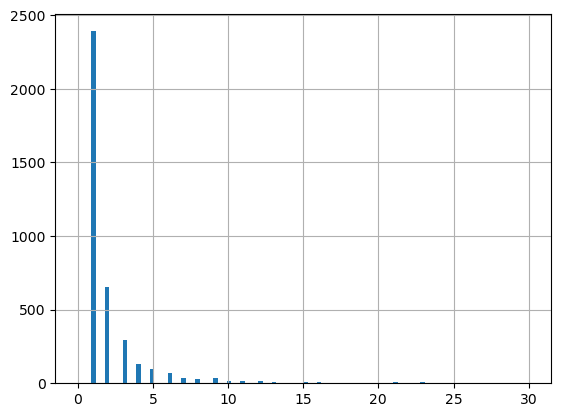

In [23]:
# y축에서 10이라는 값이 있고 
# x축이 5라면, 데이터셋에서 5번 등장하는 지역명이 10개 있다는 것을 의미

######
### 즉, 1번만 가본 여행지가 가장 많음 ... 
length = pd.DataFrame(final_merged_df['VISIT_AREA_NM'].value_counts())
length.iloc[:, 0].hist(bins=100, range=(0, 30)) 

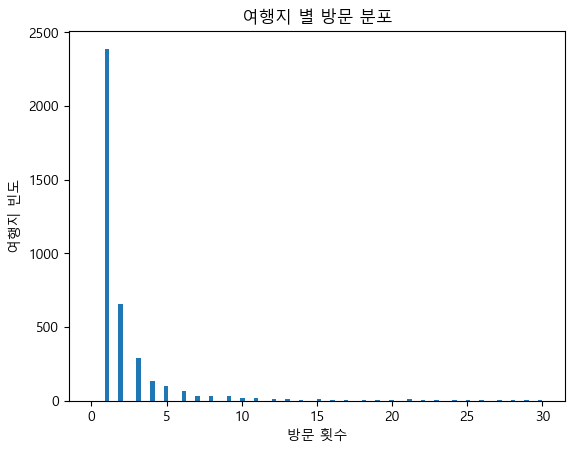

In [24]:
## 시각화 용 

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')  # 'Malgun Gothic' 대신 시스템에 설치된 다른 한글 폰트를 사용할 수 있습니다.

# final_merged_df 데이터프레임에서 'VISIT_AREA_NM'의 빈도 계산
length = pd.DataFrame(final_merged_df['VISIT_AREA_NM'].value_counts())

# 히스토그램 생성
plt.hist(length.iloc[:, 0], bins=100, range=(0, 30))

# 제목, x축 및 y축 라벨 추가 (한글 사용)
plt.title('여행지 별 방문 분포')
plt.xlabel('방문 횟수')
plt.ylabel('여행지 빈도')

# 히스토그램 표시
plt.show()

In [25]:
# 유의미한 여행지들만 필터링 (집, ~역 제거)      9733 -> 9706
drop_df = final_merged_df[final_merged_df['VISIT_AREA_NM'].isin(y_df.loc[idxes]['VISIT_AREA_NM'].values)]
drop_df

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD,VISIT_AREA_NM,Visit_Latitude,Visit_Longitude
0,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,찰리호텔,33.500951,126.519609
1,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주국제공항,33.507079,126.492769
2,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,봄그리고가을리조트,33.474145,126.911019
3,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,우도,33.504420,126.955582
4,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주 종달리전망대,33.502782,126.913254
...,...,...,...,...,...,...,...,...
9728,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,항구식당,33.219154,126.251100
9729,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주용담DT점,33.512487,126.484480
9730,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,도구리알,33.272970,126.172075
9731,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주신화월드R점,33.305809,126.316388


In [26]:
viz1 = drop_df[['VISIT_AREA_NM','TRAVEL_ID']].groupby('VISIT_AREA_NM').agg(len)    # travel_id == count  # travel_id 말고 아무열 넣어도됨
viz1['count']= 1
viz1

,TRAVEL_ID,count
VISIT_AREA_NM,,
064노트,1,1
064푸드트럭,1,1
1100고지습지 람사르습지,1,1
1100고지휴게소,7,1
1158족욕카페,1,1
...,...,...
흰백,1,1
히든클리프호텔 앤 네이쳐 치치라운지,1,1
히든클리프호텔&네이쳐,9,1


In [27]:
drop_area = viz1[viz1['TRAVEL_ID']>1].index.values   # 사람들이 1번만 많이 가서 그냥 필터링 
drop_area
print(len(drop_area))

1478


In [28]:
drop_df2 = drop_df[drop_df['VISIT_AREA_NM'].isin(drop_area)]    # 1인 곳 제외 -> drop_df2
drop_df2   # 두 번 이상 방문한 지역들만 포함     

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD,VISIT_AREA_NM,Visit_Latitude,Visit_Longitude
0,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,찰리호텔,33.500951,126.519609
1,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주국제공항,33.507079,126.492769
2,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,봄그리고가을리조트,33.474145,126.911019
3,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,우도,33.504420,126.955582
6,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,함덕해수욕장,33.543062,126.669239
...,...,...,...,...,...,...,...,...
9726,d_d012489,33.449830,126.488216,2022-11-13,2022-11-14,서머셋 제주신화월드,33.302802,126.317206
9729,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주용담DT점,33.512487,126.484480
9730,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,도구리알,33.272970,126.172075
9731,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주신화월드R점,33.305809,126.316388


In [29]:
# drop_df2의 주요 컬럼만 가져옴 
cluster_df =drop_df2[['VISIT_AREA_NM','X_COORD_Mean','Y_COORD_Mean']].drop_duplicates().reset_index(drop=True)   # 중복 허용 x 
cluster_df

,VISIT_AREA_NM,X_COORD_Mean,Y_COORD_Mean
0,찰리호텔,33.469239,126.699847
1,제주국제공항,33.469239,126.699847
2,봄그리고가을리조트,33.469239,126.699847
3,우도,33.469239,126.699847
4,함덕해수욕장,33.469239,126.699847
...,...,...,...
6354,서머셋 제주신화월드,33.449830,126.488216
6355,스타벅스 제주용담DT점,33.354688,126.368438
6356,도구리알,33.354688,126.368438
6357,스타벅스 제주신화월드R점,33.354688,126.368438


In [30]:
cluster_df

,VISIT_AREA_NM,X_COORD_Mean,Y_COORD_Mean
0,찰리호텔,33.469239,126.699847
1,제주국제공항,33.469239,126.699847
2,봄그리고가을리조트,33.469239,126.699847
3,우도,33.469239,126.699847
4,함덕해수욕장,33.469239,126.699847
...,...,...,...
6354,서머셋 제주신화월드,33.449830,126.488216
6355,스타벅스 제주용담DT점,33.354688,126.368438
6356,도구리알,33.354688,126.368438
6357,스타벅스 제주신화월드R점,33.354688,126.368438


In [31]:
# X_COORD_Mean, Y_COORD_Mean이 제주도 범위를 벗어나는지 확인

out_of_range = cluster_df[
    (cluster_df['X_COORD_Mean'] < jeju_latitude_range[0]) | (cluster_df['X_COORD_Mean'] > jeju_latitude_range[1]) |
    (cluster_df['Y_COORD_Mean'] < jeju_longitude_range[0]) | (cluster_df['Y_COORD_Mean'] > jeju_longitude_range[1])
]

# 결과 출력
print(out_of_range)

Empty DataFrame
Columns: [VISIT_AREA_NM, X_COORD_Mean, Y_COORD_Mean]
Index: []


## Clustering

In [32]:
for idx in range(len(cluster_df['X_COORD_Mean'])):
    v=cluster_df['X_COORD_Mean'][idx]
    v2=cluster_df['Y_COORD_Mean'][idx]
    if isinstance(v, str):
        cluster_df['X_COORD_Mean'][idx] = v.replace('!','1')
        if 'd' in v:
            cluster_df['X_COORD_Mean'].drop(idx,axis=0,inplace=True)
    if isinstance(v2, str):
        cluster_df['Y_COORD_Mean'][idx] = v2.replace('!','1')
        if 'd' in v2:
            cluster_df['Y_COORD_Mean'].drop(idx,axis=0,inplace=True)

In [33]:
cluster_df['X_COORD_Mean'] = cluster_df['X_COORD_Mean'].astype('float64')
cluster_df['Y_COORD_Mean'] = cluster_df['Y_COORD_Mean'].astype('float64')

In [34]:
cluster_df.dropna(inplace=True)

In [35]:
cluster_df.to_csv('./jeju_data/cluster_df.csv', index=False)

C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

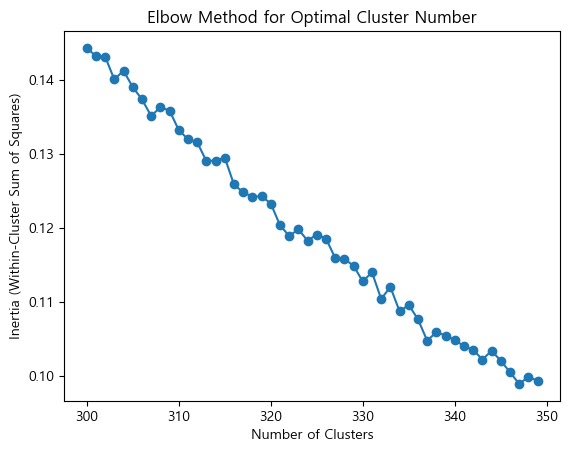

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = cluster_df.drop('VISIT_AREA_NM',axis=1)
# 클러스터 수 범위 설정
cluster_range = range(300, 350)
inertia_values = []

# 각 클러스터 수에 대한 KMeans 모델 학습 및 이너셔 기록
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 엘보우 메소드 시각화
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [37]:
X = cluster_df.drop('VISIT_AREA_NM',axis=1)
# K-means 모델 생성 및 훈련
kmeans = KMeans(n_clusters=317, random_state=42)
kmeans.fit(X)

# 클러스터 중심 확인
centroids = kmeans.cluster_centers_
# print("Centroids:", centroids)

C:\Users\sec\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
!pip install joblib

In [38]:
### 모델 저장 -> flask 연동할 때 필요 
joblib.dump(kmeans, 'jeju_gps_kmeans_model.pkl')

['jeju_gps_kmeans_model.pkl']

In [39]:
# 각 데이터 포인트의 클러스터 할당 확인
import numpy as np

labels = kmeans.labels_
cluster_df['clusterd']= labels
clusted_xy = cluster_df.drop('VISIT_AREA_NM',axis=1).groupby('clusterd').agg(np.mean)
clusted_xy.reset_index(drop=False)

C:\Users\sec\AppData\Local\Temp\ipykernel_31076\3988004142.py:6: FutureWarning: The provided callable <function mean at 0x0000021B56B2DCA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  clusted_xy = cluster_df.drop('VISIT_AREA_NM',axis=1).groupby('clusterd').agg(np.mean)


,clusterd,X_COORD_Mean,Y_COORD_Mean
0,0,33.306787,126.634938
1,1,33.464465,126.452552
2,2,33.497610,126.694124
3,3,33.293054,126.414762
4,4,33.442386,126.549233
...,...,...,...
312,312,33.542873,126.452894
313,313,33.460756,126.408800
314,314,33.308705,126.288594
315,315,33.309878,126.490423


In [40]:
temp=[]
for idx in range(len(clusted_xy)):
     temp.append((clusted_xy['X_COORD_Mean'][idx],clusted_xy['Y_COORD_Mean'][idx]))

In [41]:
import folium

coordinates = temp.copy()

# 지도의 중심 좌표 설정
map_center = (37,127)

# Folium 지도 객체 생성
map_obj = folium.Map(location=map_center, zoom_start=3)
# map_obj

In [42]:
# 좌표들을 지도에 마커로 추가
for coord in coordinates:
    folium.Marker(location=coord).add_to(map_obj)

# 지도를 HTML 파일로 저장
## 이슈: 여행지가 제주도 밖까지 넘어가버림 -> 제주도로 다시 한정 
map_obj.save('map_visualization.html')
map_obj    ## clustering된 317개 마커로 표시 

In [43]:
print(len(coordinates))

317


In [44]:
travel_area = drop_df2[['TRAVEL_ID','VISIT_AREA_NM']].groupby('VISIT_AREA_NM').agg(list)
travel_area

,TRAVEL_ID
VISIT_AREA_NM,
1100고지휴게소,"[d_d002398, d_d003798, d_d004371, d_d004483, d..."
1미리게스트하우스,"[d_d007400, d_d008066, d_d008066]"
36번가렌트하우스,"[d_d003876, d_d003876, d_d003876]"
864펜션,"[d_d002701, d_d002701, d_d002701]"
88버거,"[d_d000411, d_d001561, d_d002835, d_d006840]"
...,...
휴일로,"[d_d003620, d_d005514, d_d009295, d_d010226, d..."
휴펜션,"[d_d001883, d_d001883]"
흑돼지BBQ,"[d_d001788, d_d008987]"


In [45]:
length = [len(x) for x in travel_area['TRAVEL_ID']]
travel_area['length']=length

In [46]:
travel_area

,TRAVEL_ID,length
VISIT_AREA_NM,,
1100고지휴게소,"[d_d002398, d_d003798, d_d004371, d_d004483, d...",7
1미리게스트하우스,"[d_d007400, d_d008066, d_d008066]",3
36번가렌트하우스,"[d_d003876, d_d003876, d_d003876]",3
864펜션,"[d_d002701, d_d002701, d_d002701]",3
88버거,"[d_d000411, d_d001561, d_d002835, d_d006840]",4
...,...,...
휴일로,"[d_d003620, d_d005514, d_d009295, d_d010226, d...",6
휴펜션,"[d_d001883, d_d001883]",2
흑돼지BBQ,"[d_d001788, d_d008987]",2


In [47]:
drop_df2[['VISIT_AREA_NM']].value_counts()

VISIT_AREA_NM
제주국제공항           265
서귀포매일올레시장        122
협재해수욕장            74
함덕해수욕장            64
제주동문시장            56
                ... 
대춘해장국 노형점          2
에코루벤               2
에코티엘               2
엔게디하우스             2
히비 안도 코하쿠          2
Name: count, Length: 1478, dtype: int64

In [48]:
drop_df3 = drop_df2.dropna(subset=['X_COORD_Mean','Y_COORD_Mean'])  # 결측치 제거 -> 정제 
drop_df3

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD,VISIT_AREA_NM,Visit_Latitude,Visit_Longitude
0,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,찰리호텔,33.500951,126.519609
1,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주국제공항,33.507079,126.492769
2,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,봄그리고가을리조트,33.474145,126.911019
3,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,우도,33.504420,126.955582
6,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,함덕해수욕장,33.543062,126.669239
...,...,...,...,...,...,...,...,...
9726,d_d012489,33.449830,126.488216,2022-11-13,2022-11-14,서머셋 제주신화월드,33.302802,126.317206
9729,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주용담DT점,33.512487,126.484480
9730,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,도구리알,33.272970,126.172075
9731,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주신화월드R점,33.305809,126.316388


In [49]:
clusterd = kmeans.predict(drop_df3[['X_COORD_Mean','Y_COORD_Mean']].values)   # 예측. 훈련 x  

C:\Users\sec\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [50]:
drop_df3['cluster'] = clusterd

In [7]:
drop_df3

,TRAVEL_ID,X_COORD_Mean,Y_COORD_Mean,TRAVEL_START_YMD,TRAVEL_END_YMD,VISIT_AREA_NM,Visit_Latitude,Visit_Longitude,cluster
0,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,찰리호텔,33.500951,126.519609,258
1,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,제주국제공항,33.507079,126.492769,258
2,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,봄그리고가을리조트,33.474145,126.911019,258
3,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,우도,33.504420,126.955582,258
4,a_a002976,33.469239,126.699847,2022-10-19,2022-10-24,함덕해수욕장,33.543062,126.669239,258
...,...,...,...,...,...,...,...,...,...
7311,d_d012489,33.449830,126.488216,2022-11-13,2022-11-14,서머셋 제주신화월드,33.302802,126.317206,299
7312,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주용담DT점,33.512487,126.484480,265
7313,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,도구리알,33.272970,126.172075,265
7314,d_d012491,33.354688,126.368438,2022-11-09,2022-11-10,스타벅스 제주신화월드R점,33.305809,126.316388,265


## Matrix Setting

drop_df3.csv -> matrix setting을 위한 데이터프레임 

In [3]:
drop_df3 = pd.read_csv('drop_df3.csv')

In [6]:
drop_df3.drop(columns=['Unnamed: 0'], inplace=True)

In [53]:
drop_df3 = drop_df3[['VISIT_AREA_NM','cluster']]

In [54]:
# train, test split
# 각 클러스터별로 데이터를 분할
## -> 각 클러스터의 특징과 패턴을 고려하여 모델을 더 정확하고 효과적으로 학습시키기 위함
train, test = [], []

# 각 클러스터별로 방문한 여행지 목록을 리스트로 변환
apply_train_groupby = drop_df3.groupby('cluster')['VISIT_AREA_NM'].apply(list)

for uid, iids in zip(apply_train_groupby.index.tolist(), apply_train_groupby.values.tolist()):
    if len(iids)>2:  # 목록의 약 30%를 테스트 데이터로, 나머지를 학습 데이터로
        ratio = int(np.round(len(iids)*0.3))
        for iid in iids[ratio:]:
            train.append([uid,iid])
        for iid in iids[:ratio]:
            test.append([uid,iid])
    else:   # 여행지가 1개 또는 2개인 경우): 마지막 여행지만 테스트 데이터로 사용하고, 나머지는 학습 데이터로 사용
        for iid in iids[:-1]:
            train.append([uid,iid])
        test.append([uid, iids[-1]])

In [55]:
train_re = pd.DataFrame(train,columns=['cluster', 'VISIT_AREA_NM'])
train_df = train_re.groupby(['cluster', 'VISIT_AREA_NM']).size().unstack(fill_value=0)
test_re = pd.DataFrame(test,columns=['cluster', 'VISIT_AREA_NM'])
test_df = test_re.groupby(['cluster', 'VISIT_AREA_NM']).size().unstack(fill_value=0)

In [56]:
train_df

VISIT_AREA_NM,1100고지휴게소,1미리게스트하우스,864펜션,88버거,9.81파크,BK호텔제주,CASA블루,CGV 제주노형,CU 서귀영락해안도로점,CU 서귀포동문점,...,훈데르트윈즈,휘닉스제주,휘닉스제주 유민미술관,휴애리자연생활공원,휴애리핑크뮬리축제,휴일로,휴펜션,흑돼지BBQ,히든클리프호텔&네이쳐,히비 안도 코하쿠
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test_df

VISIT_AREA_NM,1100고지휴게소,36번가렌트하우스,88버거,9.81파크,BK호텔제주,CASA블루,CGV 제주노형,CU 서귀영락해안도로점,CU 서귀포동문점,GS25 예래자스름점,...,황우치해변,효명사,효섬마을초가집,훈데르트바서파크,훈데르트윈즈,휘닉스제주,휴애리자연생활공원,휴펜션,흑돼지BBQ,히든클리프호텔&네이쳐
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training

In [58]:
import keras.backend as K

def masked_mse(y_true, y_pred):
    # 마스크 생성: y_true가 0이 아닌 경우 True (1), 0인 경우 False (0)
    mask = K.cast(K.not_equal(y_true, 0), K.floatx())
    # y_true와 y_pred 사이의 차이를 계산하고, 마스크 적용
    diff = y_true - y_pred
    masked_diff = diff * mask
    # 제곱 오차 계산
    squared_error = K.square(masked_diff)
    # 마스크된 요소에 대해서만 오차 합산
    masked_squared_error_sum = K.sum(squared_error, axis=-1)
    # 마스크된 요소의 수 계산
    mask_sum = K.sum(mask, axis=-1)
    # 0으로 나누는 것을 방지
    mask_sum = K.maximum(mask_sum, 1)
    # 마스크된 평균 제곱 오차 계산
    masked_mse = masked_squared_error_sum / mask_sum

    return masked_mse

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras import regularizers

# 모델 파라미터 설정
input_dim = train_df.shape[1]  # 컬럼 개수
input_img = Input(shape=(input_dim,))

encoded = Dense(128, activation='elu',activity_regularizer=regularizers.l2(0.0001))(input_img)   # L2를 넣어줘야 학습 안정됨 
encoded = Dense(64, activation='elu',activity_regularizer=regularizers.l2(0.0001))(encoded)

latent = Dense(32, activation='elu',activity_regularizer=regularizers.l2(0.0001))(encoded)

decoded = Dense(64, activation='elu',activity_regularizer=regularizers.l2(0.0001))(latent)
decoded = Dense(128, activation='elu',activity_regularizer=regularizers.l2(0.0001))(decoded)
decoded = Dense(input_dim, activation='relu')(decoded)

autoencoder = Model(input_img, decoded)
# 모델 요약
autoencoder.summary()
# 모델 compile
autoencoder.compile(optimizer='adam', loss=masked_mse)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1391)]            0         
                                                                 
 dense (Dense)               (None, 128)               178176    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 1391)              179439

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#기본 파라미터 세팅
batch_size = 256
epochs = 500
verbose = 1

Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 1.4454
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 1.3966
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 1.3397
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 1.2676
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 1.1793
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0698
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 0.9414
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8055
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 0.6877
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 0.6097
Epoch 11/500
2/2 [==============================] - 0s 18ms/step - loss: 0.5585
Epoch 12/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4943
Epoch 13/500
2/2 [==============================] - 0s 8

2/2 [==============================] - 0s 0s/step - loss: 0.1152
Epoch 105/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1151
Epoch 106/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1150
Epoch 107/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1147
Epoch 108/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1142
Epoch 109/500
2/2 [==============================] - 0s 7ms/step - loss: 0.1138
Epoch 110/500
2/2 [==============================] - 0s 13ms/step - loss: 0.1134
Epoch 111/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1132
Epoch 112/500
2/2 [==============================] - 0s 14ms/step - loss: 0.1131
Epoch 113/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1131
Epoch 114/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1130
Epoch 115/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1129
Epoch 116/500
2/2 [============================

2/2 [==============================] - 0s 19ms/step - loss: 0.0998
Epoch 307/500
2/2 [==============================] - 0s 25ms/step - loss: 0.0997
Epoch 308/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0997
Epoch 309/500
2/2 [==============================] - 0s 10ms/step - loss: 0.0998
Epoch 310/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0998
Epoch 311/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0997
Epoch 312/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0997
Epoch 313/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0997
Epoch 314/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0996
Epoch 315/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0996
Epoch 316/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0996
Epoch 317/500
2/2 [==============================] - 0s 14ms/step - loss: 0.0996
Epoch 318/500
2/2 [=======================

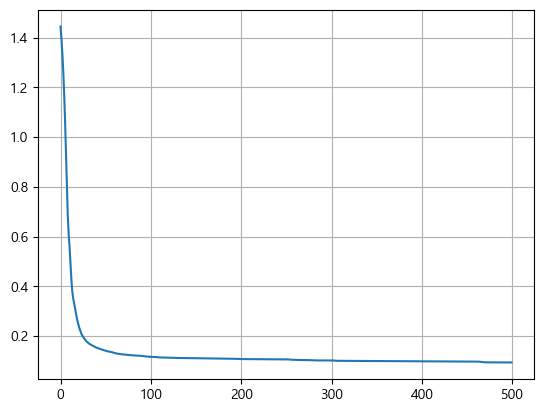

In [61]:
import matplotlib.pyplot as plt
with tf.device('/device:CPU:0'):
    # 모델 학습
    model_fit = autoencoder.fit(train_df.values.astype(np.float32),
                     train_df.values.astype(np.float32),
                    batch_size=batch_size,
                    epochs = epochs,
                    verbose=verbose)

    plt.plot(pd.DataFrame(model_fit.history))
    plt.grid(True)
    plt.show()

In [69]:
train_df.columns[0]

'1100고지휴게소'

In [70]:
# 모델 저장
autoencoder.save('jeju_autoencoder_model.h5')

## Recommendation

In [65]:
## 수정
def recommend_places(user_index, autoencoder, user_item_matrix, top_n=5):
    # 사용자 데이터 추출
    user_data = train_df.iloc[user_index].values.reshape(1, -1)

    # 모델을 사용하여 입력 데이터에 대한 예측 수행
    predicted = autoencoder.predict(user_data)

    # 예측된 점수를 실제 점수와 비교하여 추천 목록 생성
    recommended_items = user_item_matrix.columns[np.argsort(predicted[0])[::-1][:top_n]]

    return recommended_items

# 예시: 첫 번째 사용자에 대한 추천 여행지
recommended_places = recommend_places(0, autoencoder, train_df)
print(recommended_places)

1/1 [==============================] - 0s 96ms/step
Index(['한림속 하루', 'CASA블루', '곽지로온', '돔그라미펜션', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')


In [66]:
# 1부터 20까지의 각 사용자에 대해 추천 결과 출력
for user_index in range(0, 317):
    recommended_places = recommend_places(user_index, autoencoder, train_df)
    print(f"User {user_index} recommended places: {recommended_places}")

1/1 [==============================] - 0s 30ms/step
User 0 recommended places: Index(['한림속 하루', 'CASA블루', '곽지로온', '돔그라미펜션', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 1 recommended places: Index(['온더스톤게스트하우스 성산점', '한림속 하루', '큐티파이호텔', '864펜션', '더나인스테이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 2 recommended places: Index(['김녕해수욕장 야영장', '마음에온건입아파트', '온더스톤게스트하우스 성산점', '더그랜드섬오름 본관', '더나인스테이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 3 recommended places: Index(['제이뷰호텔', '제주 자몽호텔', '조이힐펜션', '864펜션', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 4 recommended places: Index(['한림속 하루', 'CASA블루', '더나인스테이', '곽지로온', '제이앤클로이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 37ms/step
User 5 recommended places: Index(['한림

1/1 [==============================] - 0s 22ms/step
User 45 recommended places: Index(['한림속 하루', '864펜션', '더나인스테이', '온더스톤게스트하우스 성산점', '더그랜드섬오름 본관'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 46 recommended places: Index(['한림속 하루', '864펜션', '더나인스테이', '큐티파이호텔', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 17ms/step
User 47 recommended places: Index(['한림속 하루', '큐티파이호텔', '제이앤클로이', '하버호텔', '오소소게스트하우스'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 48 recommended places: Index(['한림속 하루', '애월스테이인제주', '864펜션', '제이앤클로이', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 18ms/step
User 49 recommended places: Index(['864펜션', '온더스톤게스트하우스 성산점', '한림속 하루', '하버호텔', '큐티파이호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 22ms/step
User 50 recommended places: Index([

1/1 [==============================] - 0s 19ms/step
User 91 recommended places: Index(['온더스톤게스트하우스 성산점', '한림속 하루', '864펜션', '큐티파이호텔', '성산스테이션'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 23ms/step
User 92 recommended places: Index(['한림속 하루', '온더스톤게스트하우스 성산점', '제이앤클로이', '864펜션', '큐티파이호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 32ms/step
User 93 recommended places: Index(['한림속 하루', '곽지로온', '해비치호텔앤드리조트 제주', '제주도하숙집 게스트하우스', '더스테이센추리호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 94 recommended places: Index(['한림속 하루', '제주도하숙집 게스트하우스', 'CASA블루', '곽지로온', '더나인스테이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 28ms/step
User 95 recommended places: Index(['성산스테이션', '벨룸리조트', '864펜션', '온더스톤게스트하우스 성산점', '제이앤클로이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 31ms/step
User 96 recommended places: 

1/1 [==============================] - 0s 20ms/step
User 136 recommended places: Index(['한림속 하루', '864펜션', '하버호텔', '온더스톤게스트하우스 성산점', '큐티파이호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 21ms/step
User 137 recommended places: Index(['한림속 하루', '성산스테이션', '제이뷰호텔', '호랑이주택', '864펜션'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 18ms/step
User 138 recommended places: Index(['한림속 하루', '곽지로온', '성산스테이션', '제주토비스콘도 본관', '애월스테이인제주'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 21ms/step
User 139 recommended places: Index(['마음에온건입아파트', '한림속 하루', '오소소게스트하우스', 'CASA블루', '마레1440'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 21ms/step
User 140 recommended places: Index(['한림속 하루', '곽지로온', '온더스톤게스트하우스 성산점', '864펜션', '더나인스테이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 141 recommended places: Index(['한림속 하루', 

1/1 [==============================] - 0s 24ms/step
User 181 recommended places: Index(['한림속 하루', '더나인스테이', '마음에온건입아파트', '큐티파이호텔', '864펜션'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 33ms/step
User 182 recommended places: Index(['오소소게스트하우스', '신신호텔 서귀포점', '큐티파이호텔', '곽지로온', '한림속 하루'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 25ms/step
User 183 recommended places: Index(['CASA블루', '마음에온건입아파트', '라마다프라자 제주호텔', '더스테이센추리호텔', '마레1440'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 184 recommended places: Index(['한림속 하루', '더나인스테이', '곽지로온', '더그랜드섬오름 본관', '온더스톤게스트하우스 성산점'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 185 recommended places: Index(['온더스톤게스트하우스 성산점', '한림속 하루', '864펜션', '곽지로온', '큐티파이호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 18ms/step
User 186 recommended places: In

1/1 [==============================] - 0s 23ms/step
User 226 recommended places: Index(['한림속 하루', '애월스테이인제주', '864펜션', '온더스톤게스트하우스 성산점', '제이앤클로이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 30ms/step
User 227 recommended places: Index(['한림속 하루', '신신호텔 천지연', '호랑이주택', '큐티파이호텔', '더나인스테이'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 18ms/step
User 228 recommended places: Index(['한림속 하루', '864펜션', '하버호텔', '큐티파이호텔', '제주토비스콘도 본관'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 13ms/step
User 229 recommended places: Index(['한림속 하루', '곽지로온', '제주도하숙집 게스트하우스', '온더스톤게스트하우스 성산점', '더그랜드섬오름 본관'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 230 recommended places: Index(['온더스톤게스트하우스 성산점', '864펜션', '한림속 하루', '유수암캠핑장', '하버호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 231 recommended places: I

1/1 [==============================] - 0s 10ms/step
User 271 recommended places: Index(['한림속 하루', '더나인스테이', '곽지로온', '오소소게스트하우스', 'CASA블루'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 18ms/step
User 272 recommended places: Index(['한림속 하루', '호랑이주택', '864펜션', '일도신천지2차아파트', '애월스테이인제주'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 20ms/step
User 273 recommended places: Index(['한림속 하루', '864펜션', '애월스테이인제주', '온더스톤게스트하우스 성산점', '곽지로온'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 28ms/step
User 274 recommended places: Index(['마음에온건입아파트', '한림속 하루', '오소소게스트하우스', 'CASA블루', '큐티파이호텔'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 36ms/step
User 275 recommended places: Index(['한림속 하루', '864펜션', '곽지로온', '온더스톤게스트하우스 성산점', '제주도하숙집 게스트하우스'], dtype='object', name='VISIT_AREA_NM')
1/1 [==============================] - 0s 19ms/step
User 276 recommended places: Inde

1/1 [==============================] - 0s 20ms/step
User 316 recommended places: Index(['한림속 하루', '애월스테이인제주', '온더스톤게스트하우스 성산점', '864펜션', '제이앤클로이'], dtype='object', name='VISIT_AREA_NM')


In [67]:
# 사용자별 추천 결과를 저장할 빈 리스트
user_recommendations = []

# 0부터 316까지의 각 사용자에 대해 추천 결과 수집
for user_index in range(0, 317):
    recommended_places = recommend_places(user_index, autoencoder, train_df)
    user_recommendations.append([user_index, recommended_places])

# 결과를 데이터프레임으로 변환
recommendations_df = pd.DataFrame(user_recommendations, columns=['User Index', 'Recommended Places'])

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


In [68]:
recommendations_df

,User Index,Recommended Places
0,0,"Index(['한림속 하루', 'CASA블루', '곽지로온', '돔그라미펜션', '..."
1,1,"Index(['온더스톤게스트하우스 성산점', '한림속 하루', '큐티파이호텔', '..."
2,2,"Index(['김녕해수욕장 야영장', '마음에온건입아파트', '온더스톤게스트하우스 ..."
3,3,"Index(['제이뷰호텔', '제주 자몽호텔', '조이힐펜션', '864펜션', '..."
4,4,"Index(['한림속 하루', 'CASA블루', '더나인스테이', '곽지로온', '..."
...,...,...
312,312,"Index(['한림속 하루', '큐티파이호텔', '성산스테이션', '온더스톤게스트하..."
313,313,"Index(['한림속 하루', '곽지로온', '유수암캠핑장', '온더스톤게스트하우스..."
314,314,"Index(['어린왕자감귤밭', '제주 자몽호텔', '제이라움', '퍼스트70', ..."
315,315,"Index(['한림속 하루', '864펜션', '온더스톤게스트하우스 성산점', '하..."


In [71]:
recommendations_df.to_csv('jeju_recommendations_df.csv')

## User Cluster Predict(예시)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import joblib

# 학습된 K-means 모델 로드
kmeans1 = joblib.load('jeju_gps_kmeans_model.pkl')

# 사용자 위치 정보 예시 (위도, 경도) -> 받아오기 
user_latitude = 33.31
user_longitude = 126.5

# 사용자 위치를 배열로 변환 (K-means 모델에 입력하기 위함)
user_location = np.array([[user_latitude, user_longitude]])

# K-means 모델을 사용하여 클러스터 예측
cluster_label = kmeans1.predict(user_location)

# 어느 클러스터에 속하는지 출력
print(f"User is in cluster number: {cluster_label[0]}")


## Flask 연동(예시)

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import joblib
import pandas as pd

app = Flask(__name__)

# 필요한 파일들 로드
kmeans = joblib.load('./jeju_gps_kmeans_model.pkl') # K-means 모델 로드
recommendations_df = pd.read_csv('jeju_recommendations_df.csv') # 추천 장소 데이터 로드

@app.route('/recommend', methods=['POST'])
def get_recommendations():
    data = request.get_json()
    if not data or 'latitude' not in data or 'longitude' not in data:
        return jsonify({'error': 'Missing data'}), 400

    user_latitude = data['latitude']
    user_longitude = data['longitude']
    
    # 데이터 유효성 검사 (예시)
    if not (-90 <= user_latitude <= 90) or not (-180 <= user_longitude <= 180):
        return jsonify({'error': 'Invalid latitude or longitude'}), 400

    # 사용자 위치를 배열로 변환 및 클러스터 예측
    user_location = np.array([[user_latitude, user_longitude]])
    cluster_label = kmeans.predict(user_location)[0]

    # 클러스터에 해당하는 추천 장소 검색
    recommended_places = recommendations_df[recommendations_df['cluster'] == cluster_label]['recommended_places']

    return jsonify({'cluster': cluster_label, 'recommended_places': recommended_places.tolist()})

if __name__ == '__main__':
    app.run(debug=True)  # 프로덕션 환경에서는 debug=False를 사용하거나 완전히 제거
